In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor,     GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report

In [8]:
import matplotlib
matplotlib.use('TkAgg')

In [3]:
df = pd.read_csv('farm_survey.csv')
df = df.dropna()
df.head()

,Unnamed: 0,Year,Farmer Tracenet code,Village,District,State,Latitude,Longitude,Crops,Area (HA),Estimated yield (MT),geometry,yield
55,55,2016,AP0923000027,Enabavi,Jangaon,Telangana,17.657379,79.132052,Tomato,0.1,250.0,POINT (79.132052 17.657379),2500.0
56,56,2016,AP0923000027,Enabavi,Jangaon,Telangana,17.657379,79.132052,Paddy,0.5,15.0,POINT (79.132052 17.657379),30.0
57,57,2016,AP0923000028,Enabavi,Jangaon,Telangana,17.657381,79.132054,Paddy,0.2,8.0,POINT (79.132054 17.657381),40.0
58,58,2016,AP0923000029,Enabavi,Jangaon,Telangana,17.657389,79.132062,Paddy,0.5,15.0,POINT (79.132062 17.657389),30.0
59,59,2016,AP0929000001,Enabavi,Jangaon,Telangana,17.657354,79.132027,Paddy,0.5,15.0,POINT (79.13202699999999 17.657354),30.0


In [4]:
%pylab inline

#'Village', 'District','State', 
FEATURES = ['Year', 'Latitude', 'Longitude', 'Area (HA)']
LABEL = ['Crops']

df = df[FEATURES+LABEL]


X = df[FEATURES]

y_pre = df['Crops'].str.lower()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y_pre)

df.head()

Populating the interactive namespace from numpy and matplotlib


,Year,Latitude,Longitude,Area (HA),Crops
55,2016,17.657379,79.132052,0.1,Tomato
56,2016,17.657379,79.132052,0.5,Paddy
57,2016,17.657381,79.132054,0.2,Paddy
58,2016,17.657389,79.132062,0.5,Paddy
59,2016,17.657354,79.132027,0.5,Paddy


In [5]:
from pandas_profiling import ProfileReport
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
plt.figure(figsize=(8,8))
plt.title("Correlation between features")
corr = X.corr()
sns.heatmap(corr, annot=True)
plt.show()

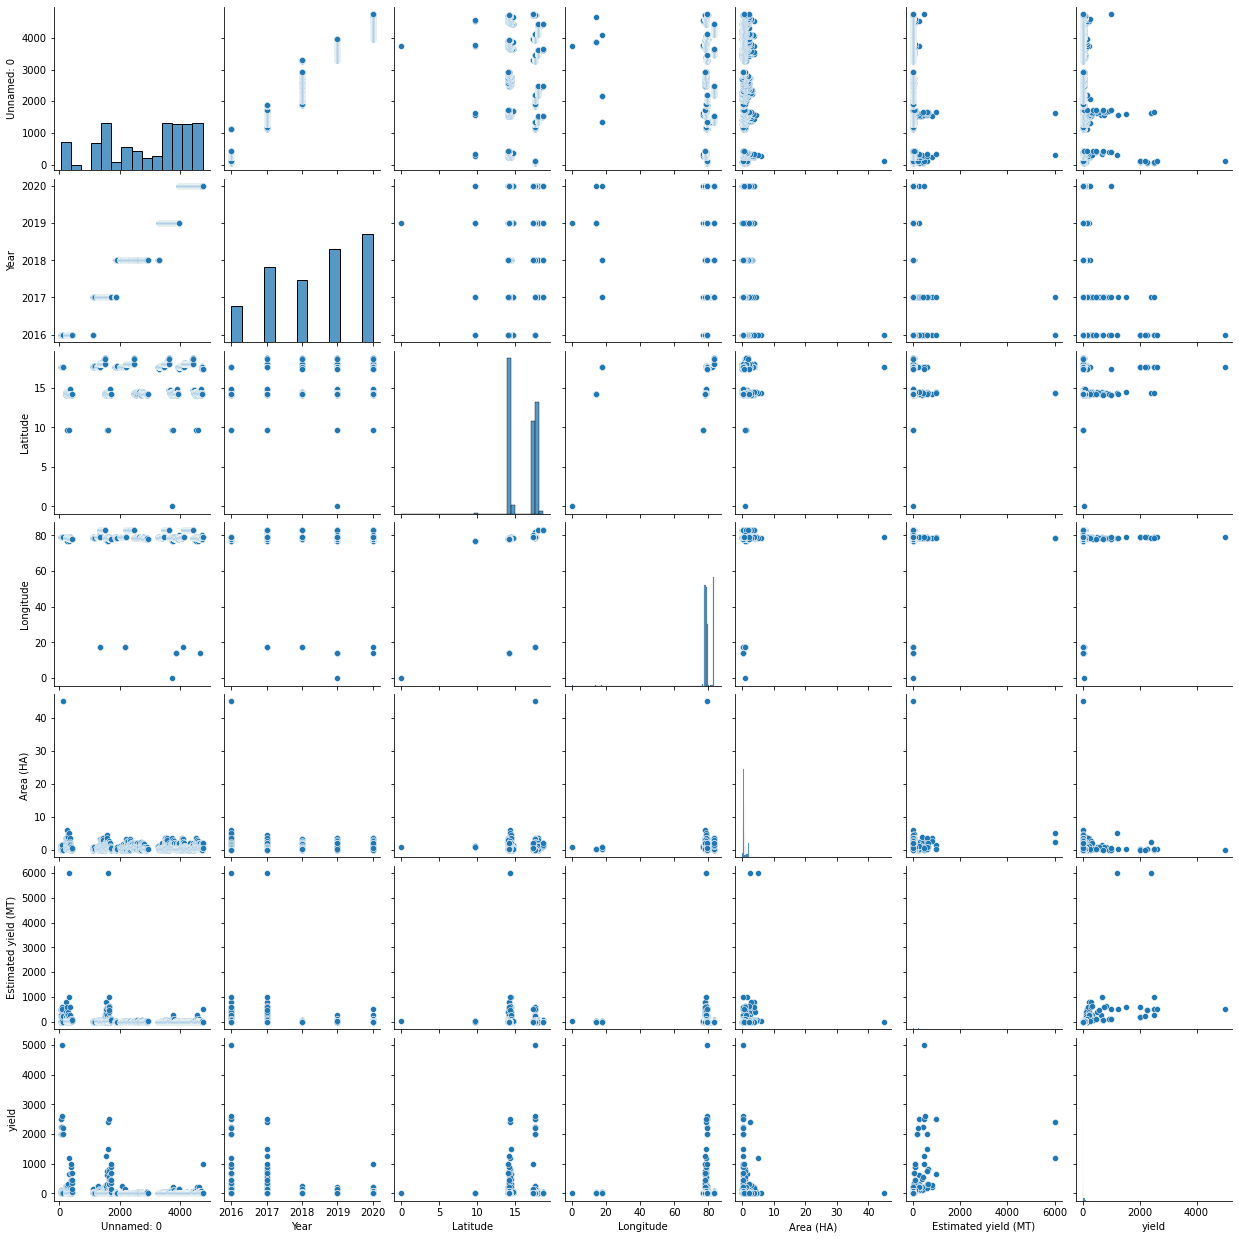

In [52]:
sns.pairplot(df)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
lr = LinearRegression().fit(X_train, y_train)
lr_pred= lr.score(X_test, y_test)

print("Training score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test score: {:.3f}".format(lr.score(X_test, y_test)))

Training score: 0.047
Test score: 0.031


***Random Forest***

In [12]:
rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
rf_pred= rf.score(X_test, y_test)

print("Training score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test score: {:.3f}".format(rf.score(X_test, y_test)))

Training score: 0.895
Test score: 0.488


In [13]:
y_pre.values

array(['tomato', 'paddy', 'paddy', ..., 'red gram', 'cotton', 'tomato'],
      dtype=object)

In [14]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,rf.predict(X_test))

targets = range(len(np.unique(y_train)))
df_cm = pd.DataFrame(mat, list(targets), list(targets))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

ValueError: Shape of passed values is (81, 81), indices imply (85, 85)

In [15]:
mat

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 15, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  3,  0],
       [ 0,  0,  1, ...,  0,  0,  0]])

In [16]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), rf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

In [17]:
gbr = GradientBoostingClassifier(n_estimators=20, max_depth=4, max_features=2, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.654
Test score: 0.457


In [18]:
log_reg = LogisticRegression(C=0.1, max_iter=100000).fit(X_train, y_train)
log_reg_pred= log_reg.score(X_test, y_test)

print("Training score: {:.3f}".format(log_reg.score(X_train, y_train)))
print("Test score: {:.3f}".format(log_reg.score(X_test, y_test)))

Training score: 0.339
Test score: 0.336
